<a href="https://colab.research.google.com/github/joaramirezra/Clasificador-Hojas-Canabis/blob/Version2/imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import requests
import io
from matplotlib import pyplot as plt

import PIL

In [20]:
def print_images(*images):
  subplots = len(images)

  plt.figure(figsize=(15,5))
  for i,img in enumerate(images) :
    plt.subplot(1,subplots,(i+1))
    plt.imshow(img,interpolation='none')
  plt.grid(0)
  plt.show()

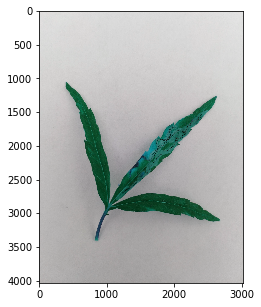

In [21]:
Cuarzo = requests.get("https://raw.githubusercontent.com/joaramirezra/Clasificador-Hojas-Canabis/master/Imagenes/Manchas/E14.jpg")
image_bytes = io.BytesIO(Cuarzo.content)
img = PIL.Image.open(image_bytes)
img.save("geeks.jpg") 

img = cv2.imread("geeks.jpg",1)
print_images(img)

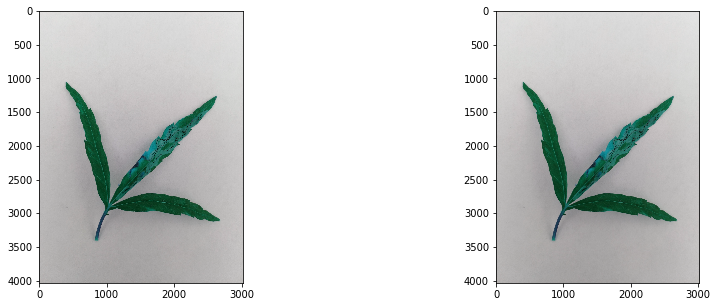

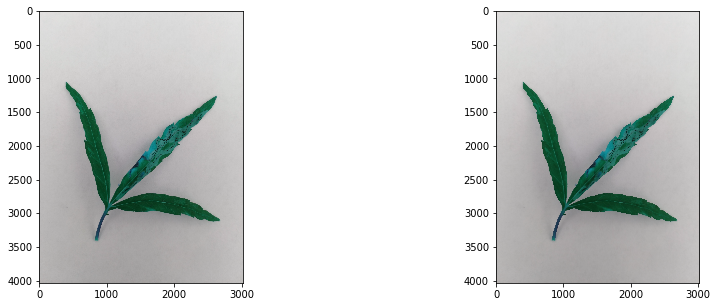

In [22]:
gausian = cv2.GaussianBlur(img,(5,5),0)
bilateral =cv2.bilateralFilter(img , 9, 75, 75, cv2.BORDER_DEFAULT);
meanshift = cv2.pyrMeanShiftFiltering(img,sp=5,sr=50)

print_images(img,gausian)
print_images(bilateral,meanshift)

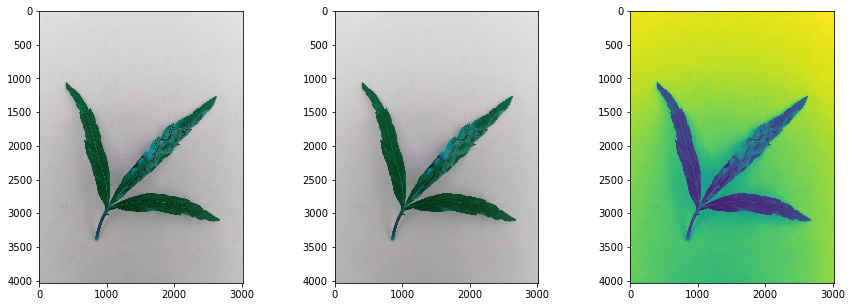

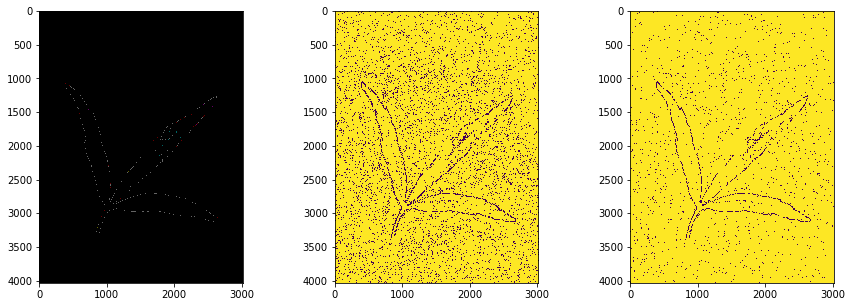

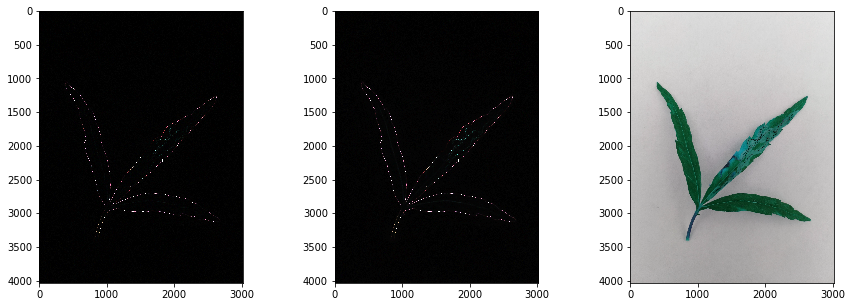

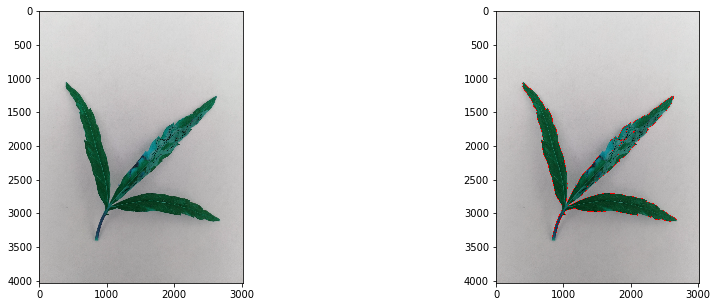

In [23]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))



meanshift = cv2.pyrMeanShiftFiltering(img,sp=5,sr=70)
gray_scr = cv2.cvtColor( meanshift , cv2.COLOR_BGR2GRAY )

print_images(img,meanshift,gray_scr)

laplacian = cv2.Laplacian(meanshift,ddepth = cv2.CV_32FC3, ksize=3 )
laplacian = cv2.convertScaleAbs(laplacian)

closing = cv2.cv2.morphologyEx(laplacian,cv2.MORPH_CLOSE, kernel)

closing2 = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)

ret, binary = cv2.threshold(closing,50,100,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(closing2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(closing2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

print_images(binary,th2,th3)

original = img.copy()
print_images(laplacian,closing, original )

binary =   cv2.cvtColor( binary , cv2.COLOR_BGR2GRAY )
cnts = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
  area = cv2.contourArea(c)
  if area > 50:
    cv2.drawContours(original,[c], 0, (250,0,0), 2)
  
print_images(img, original)